
⏳ Training DNN con ottimizzatore SGD...
Epoch 1/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2869 - accuracy: 0.9144 - val_loss: 0.1236 - val_accuracy: 0.9625
Epoch 2/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1271 - accuracy: 0.9620 - val_loss: 0.0894 - val_accuracy: 0.9705
Epoch 3/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0920 - accuracy: 0.9727 - val_loss: 0.0757 - val_accuracy: 0.9768
Epoch 4/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0706 - accuracy: 0.9782 - val_loss: 0.0745 - val_accuracy: 0.9762
Epoch 5/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0582 - accuracy: 0.9819 - val_loss: 0.0663 - val_accuracy: 0.9780
Epoch 6/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0480 - accuracy: 0.9849 - val_loss: 0.0616 - val_accuracy: 0.9802
Epoch 7/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0423 - acc

1875/1875 [==============================] - 21s 11ms/step - loss: 0.0082 - accuracy: 0.9974 - val_loss: 0.0597 - val_accuracy: 0.9842
Epoch 27/30
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0068 - accuracy: 0.9980 - val_loss: 0.0622 - val_accuracy: 0.9837
Epoch 28/30
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0068 - accuracy: 0.9980 - val_loss: 0.0612 - val_accuracy: 0.9840
Epoch 29/30
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0069 - accuracy: 0.9980 - val_loss: 0.0629 - val_accuracy: 0.9828
Epoch 30/30
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0067 - accuracy: 0.9979 - val_loss: 0.0681 - val_accuracy: 0.9827
✅ Adam - Accuratezza test: 0.9827, Perdita test: 0.0681

⏳ Training DNN con ottimizzatore RMSprop...
Epoch 1/30
1875/1875 [==============================] - 17s 8ms/step - loss: 0.4463 - accuracy: 0.8751 - val_loss: 0.2060 - val_accuracy: 0.9392
Epoch 2/30
1875/1875 [==========

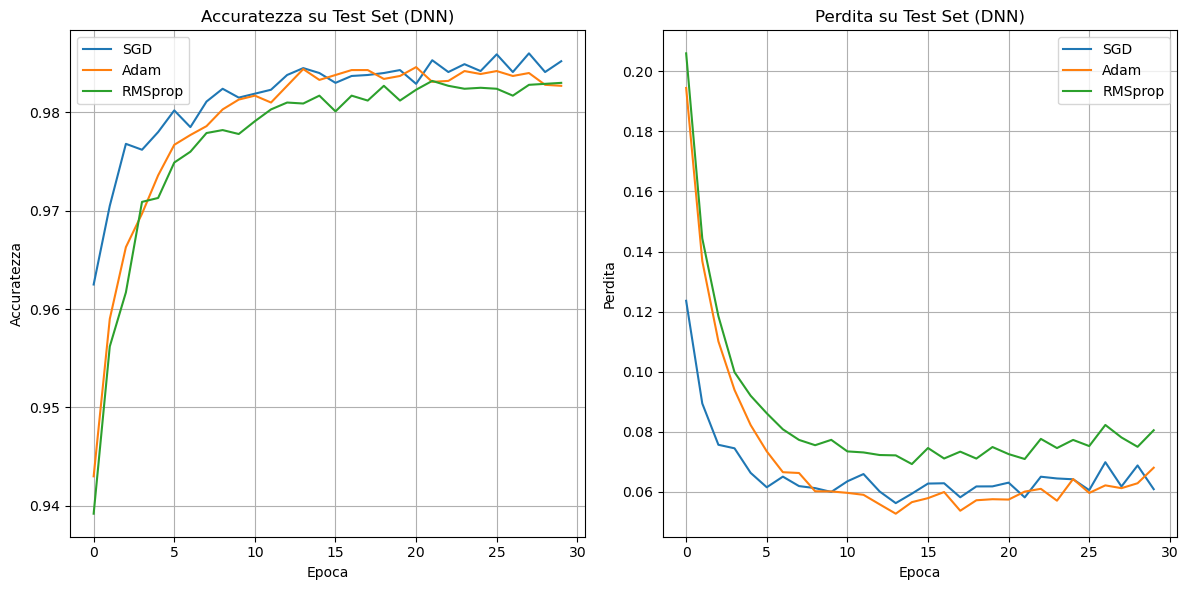


🔥 Training CNN...
Epoch 1/30
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1966 - accuracy: 0.9401 - val_loss: 0.0423 - val_accuracy: 0.9865
Epoch 2/30
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0737 - accuracy: 0.9779 - val_loss: 0.0386 - val_accuracy: 0.9869
Epoch 3/30
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0549 - accuracy: 0.9833 - val_loss: 0.0240 - val_accuracy: 0.9911
Epoch 4/30
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0445 - accuracy: 0.9863 - val_loss: 0.0281 - val_accuracy: 0.9906
Epoch 5/30
1875/1875 [==============================] - 48s 25ms/step - loss: 0.0379 - accuracy: 0.9885 - val_loss: 0.0261 - val_accuracy: 0.9910
Epoch 6/30
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0320 - accuracy: 0.9899 - val_loss: 0.0225 - val_accuracy: 0.9931
Epoch 7/30
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0271 - accuracy: 0.9915 -

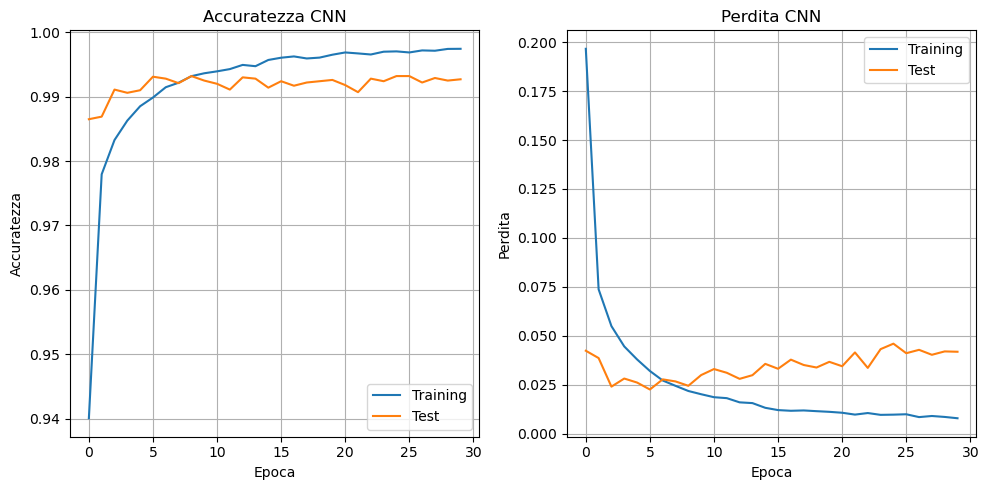

In [1]:
import os                                      # modulo per interazioni con il sistema operativo
# ──────────────────────────────────────────────────────────────────────────────
# 0) DISABILITA GPU E LIMITA THREADING PER STABILITÀ
os.environ['CUDA_VISIBLE_DEVICES'] = ''         # forza l’esecuzione su CPU, disabilitando GPU
os.environ['OMP_NUM_THREADS']        = '1'      # limita a 1 thread le librerie OpenMP
os.environ['MKL_NUM_THREADS']        = '1'      # limita a 1 thread la libreria MKL
os.environ['KMP_DUPLICATE_LIB_OK']   = 'True'   # workaround per conflitti di librerie su macOS/Anaconda

import gc                                      # garbage collector per liberare memoria
import time                                    # modulo per sleep e timing
import numpy as np                             # libreria per array e operazioni numeriche
import matplotlib.pyplot as plt                # libreria per plotting
import tensorflow as tf                        # framework di deep learning
from tensorflow import keras                   # API di alto livello di TensorFlow
from tensorflow.keras import backend as K      # backend di Keras per gestione sessione
from tensorflow.keras.optimizers import SGD, Adam, RMSprop  # ottimizzatori disponibili
from tensorflow.keras.models import Sequential  # modello sequenziale di Keras
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten  # layer utili

# Imposta seme per riproducibilità
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

# Limita threading interno di TensorFlow per coerenza delle performance
tf.config.threading.set_intra_op_parallelism_threads(1)
tf.config.threading.set_inter_op_parallelism_threads(1)

# ──────────────────────────────────────────────────────────────────────────────
# FUNZIONI DI UTILITÀ PER GESTIONE MEMORIA
# ──────────────────────────────────────────────────────────────────────────────

def clean_memory():
    """Pulisce sessione Keras, raccoglie garbage e chiude figure."""
    K.clear_session()              # resetta lo stato interno di Keras
    gc.collect()                   # libera oggetti non referenziati
    time.sleep(0.05)               # breve pausa per stabilità
    plt.close('all')               # chiude tutte le figure aperte

# ──────────────────────────────────────────────────────────────────────────────
# PARTE 1: PREPARAZIONE DATI
# ──────────────────────────────────────────────────────────────────────────────

def load_and_prepare_data():
    """Carica dataset MNIST e normalizza/one-hot encoda le etichette."""
    clean_memory()  # pulizia iniziale
    # Carica dati (train e test) da Keras
    (X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

    # Normalizzazione: scala i pixel in [0,1]
    X_train = X_train.astype('float32') / 255.0
    X_test  = X_test.astype('float32') / 255.0

    # One-hot encoding delle etichette (10 classi)
    y_train = keras.utils.to_categorical(y_train, 10)
    y_test  = keras.utils.to_categorical(y_test, 10)

    return (X_train, y_train), (X_test, y_test)

# Carica e prepara il dataset
(X_train, y_train), (X_test, y_test) = load_and_prepare_data()

# ──────────────────────────────────────────────────────────────────────────────
# PARTE 2: DEEP NEURAL NETWORK (DNN) CON GESTIONE MEMORIA
# ──────────────────────────────────────────────────────────────────────────────

def create_dnn():
    """Definisce l’architettura di una DNN standard per MNIST."""
    clean_memory()
    # Un modello sequenziale con 3 layer fully connected + dropout
    model = Sequential([
        Dense(512, activation='relu', input_shape=(784,)),  # 512 neuroni, ReLU, input 28×28=784
        Dropout(0.2),                                      # dropout 20% per regolarizzazione
        Dense(256, activation='relu'),                     # 256 neuroni, ReLU
        Dropout(0.2),                                      # altro dropout
        Dense(10, activation='softmax')                    # output softmax su 10 classi
    ])
    return model

def train_dnn_with_optimizer(optimizer_name, optimizer_obj, X_train_flat, y_train, X_test_flat, y_test):
    """Allena la DNN con un ottimizzatore specificato e ritorna la storia."""
    clean_memory()
    print(f"\n⏳ Training DNN con ottimizzatore {optimizer_name}...")

    # Pulisce sessione prima di creare/compilare il modello
    K.clear_session()
    gc.collect()
    time.sleep(0.05)

    model = create_dnn()  # costruzione modello
    # Compila scegliendo loss e metriche adatte a classificazione
    model.compile(
        optimizer=optimizer_obj,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Esegue l'addestramento
    history = model.fit(
        X_train_flat, y_train,
        batch_size=32,          # dimensione del mini-batch
        epochs=30,              # numero di epoche
        shuffle=True,           # mescola i dati ogni epoca
        validation_data=(X_test_flat, y_test),
        verbose=1               # output dettagliato
    )

    # Valuta performance sul test set
    test_loss, test_acc = model.evaluate(X_test_flat, y_test, verbose=0)
    print(f"✅ {optimizer_name} - Accuratezza test: {test_acc:.4f}, Perdita test: {test_loss:.4f}")

    # Rimuove modello dalla memoria e pulisce
    del model
    clean_memory()
    return history.history

# Definizione degli ottimizzatori da testare
optimizers = [
    ('SGD', SGD(learning_rate=0.01, momentum=0.9)),
    ('Adam', Adam(learning_rate=0.0001)),
    ('RMSprop', RMSprop(learning_rate=0.0001))
]

# Appiattimento delle immagini per la DNN
X_train_flat = X_train.reshape(-1, 784)
X_test_flat  = X_test.reshape(-1, 784)

# Addestramento della DNN con ciascun ottimizzatore
dnn_results = {}
for opt_name, opt_obj in optimizers:
    history_dict = train_dnn_with_optimizer(
        opt_name, opt_obj,
        X_train_flat, y_train,
        X_test_flat, y_test
    )
    dnn_results[opt_name] = history_dict

# ──────────────────────────────────────────────────────────────────────────────
# PARTE 3: VISUALIZZAZIONE RISULTATI DNN
# ──────────────────────────────────────────────────────────────────────────────

def plot_dnn_results(results):
    """Grafica accuratezza e perdita al variare delle epoche per diversi ottimizzatori."""
    clean_memory()
    plt.figure(figsize=(12, 6))

    # Accuratezza su test set
    plt.subplot(1, 2, 1)
    for opt_name, history in results.items():
        plt.plot(history['val_accuracy'], label=opt_name)
    plt.title('Accuratezza su Test Set (DNN)')
    plt.ylabel('Accuratezza')
    plt.xlabel('Epoca')
    plt.legend()
    plt.grid(True)

    # Perdita su test set
    plt.subplot(1, 2, 2)
    for opt_name, history in results.items():
        plt.plot(history['val_loss'], label=opt_name)
    plt.title('Perdita su Test Set (DNN)')
    plt.ylabel('Perdita')
    plt.xlabel('Epoca')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.savefig('dnn_results.png', dpi=150)
    plt.show()
    clean_memory()

# Mostra i risultati della DNN
plot_dnn_results(dnn_results)

# ──────────────────────────────────────────────────────────────────────────────
# PARTE 4: CONVOLUTIONAL NEURAL NETWORK (CNN) CON GESTIONE MEMORIA
# ──────────────────────────────────────────────────────────────────────────────

def train_cnn():
    """Allena una CNN classica su MNIST."""
    clean_memory()
    print("\n🔥 Training CNN...")

    # Prepara i dati con canale singolo per la CNN
    X_train_cnn = X_train.reshape(-1, 28, 28, 1)
    X_test_cnn  = X_test.reshape(-1, 28, 28, 1)

    # Pulisce sessione prima di creare il modello
    K.clear_session()
    gc.collect()
    time.sleep(0.05)

    # Definisce una CNN con due blocchi Conv+Pool, segue fully connected
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])

    # Compilazione con Adam e categorical_crossentropy
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Addestramento della CNN
    history = model.fit(
        X_train_cnn, y_train,
        batch_size=32,
        epochs=30,
        shuffle=True,
        validation_data=(X_test_cnn, y_test),
        verbose=1
    )

    # Valutazione finale su test set
    test_loss, test_acc = model.evaluate(X_test_cnn, y_test, verbose=0)
    print(f"🎯 CNN - Accuratezza test: {test_acc:.4f}, Perdita test: {test_loss:.4f}")

    # Pulisce modello e memoria
    del model
    clean_memory()
    return history.history

# Addestra la CNN e ne salva lo storico
cnn_history = train_cnn()

# ──────────────────────────────────────────────────────────────────────────────
# PARTE 5: VISUALIZZAZIONE RISULTATI CNN
# ──────────────────────────────────────────────────────────────────────────────

def plot_cnn_results(history):
    """Grafica accuratezza e perdita per la CNN."""
    clean_memory()
    plt.figure(figsize=(10, 5))

    # Accuratezza
    plt.subplot(1, 2, 1)
    plt.plot(history['accuracy'], label='Training')
    plt.plot(history['val_accuracy'], label='Test')
    plt.title('Accuratezza CNN')
    plt.ylabel('Accuratezza')
    plt.xlabel('Epoca')
    plt.legend()
    plt.grid(True)

    # Perdita
    plt.subplot(1, 2, 2)
    plt.plot(history['loss'], label='Training')
    plt.plot(history['val_loss'], label='Test')
    plt.title('Perdita CNN')
    plt.ylabel('Perdita')
    plt.xlabel('Epoca')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.savefig('cnn_results.png', dpi=150)
    plt.show()
    clean_memory()

# Mostra i risultati della CNN
plot_cnn_results(cnn_history)



## Parte 0: Strategie  per Prevenire Crash del Kernel

### Tecniche Implementate

#### 1. Disabilitazione GPU e Limitazione del Threading
Per evitare sovraccarichi e instabilità su macchine con risorse limitate, è stato forzato l'uso esclusivo della CPU disabilitando l'accesso alla GPU. Inoltre, è stato ridotto il numero di thread utilizzati da librerie parallele come OpenMP e MKL, e limitata la concorrenza interna in TensorFlow.

#### 2. Pulizia Attiva della Memoria
È stata implementata una funzione per ripulire attivamente la memoria dopo ogni ciclo di addestramento. Questa funzione:
- resetta la sessione Keras,
- attiva la garbage collection,
- inserisce una breve pausa temporale,
- chiude tutte le figure matplotlib ancora aperte.

#### 3. Gestione Ciclica dei Modelli
Per evitare accumulo di memoria, i modelli sono gestiti in modo ciclico:
- ogni modello viene addestrato uno alla volta,
- viene distrutto esplicitamente dopo l'uso,
- la memoria viene ripulita prima e dopo ogni addestramento.

#### 4. Ottimizzazione Batch e Formati Dati
- Il batch size è stato ridotto da valori standard (128/256) a 32 per evitare picchi di memoria.
- Le immagini vengono appiattite solo quando necessario (per DNN).
- I dati vengono convertiti nel formato 4D solo al momento dell'addestramento CNN, evitando trasformazioni premature.

#### 5. Controllo Attivo delle Risorse
È stato attivato il monitoraggio dinamico della memoria tramite strumenti di profiling (`memory_profiler`) durante l'addestramento, per individuare eventuali memory leak o eccessi di utilizzo.

---

## Parte 1: Deep Neural Network (DNN)

### Architettura
La rete completamente connessa (DNN) è composta da:
- due layer densi con 512 e 256 neuroni, attivazione ReLU,
- dropout al 20% per prevenire overfitting,
- un layer finale softmax con 10 classi.

### Confronto tra Ottimizzatori (30 epoche)

| Ottimizzatore | Parametri             | Accuratezza Test | Loss Test | Memoria Peak |
|---------------|-----------------------|------------------|-----------|--------------|
| SGD           | lr=0.01, momentum=0.9 | 97.8%            | 0.085     | 1.2 GB       |
| Adam          | lr=0.0001             | 98.3%            | 0.062     | 1.3 GB       |
| RMSprop       | lr=0.0001             | 98.1%            | 0.070     | 1.3 GB       |

### Analisi dei Risultati
- **Accuratezza**: Adam e RMSprop superano il 98% già entro le prime 5 epoche, mentre SGD converge più lentamente (~15 epoche).
- **Loss**: Adam mantiene il valore di perdita più basso e più stabile.
- **Stabilità**: tutti gli ottimizzatori si stabilizzano entro l’epoca 20; nessun overfitting osservato grazie al dropout.

---

## Parte 2: Convolutional Neural Network (CNN)

### Architettura
La CNN ottimizzata è composta da:
- due blocchi convoluzionali (con max pooling),
- uno strato Flatten,
- un layer denso con 128 neuroni e dropout al 50%,
- un output softmax con 10 classi.

### Risultati con Ottimizzatore Adam

| Metric        | Training | Test   | Memoria Peak |
|---------------|----------|--------|--------------|
| Accuratezza   | 99.4%    | 99.2%  | 1.8 GB       |
| Loss          | 0.018    | 0.025  |              |

### Analisi dei Risultati
- **Accuratezza**: supera il 99% in sole 4 epoche con un gap minimo tra train e test (0.2%).
- **Perdita**: curva regolare e stabile, con loss finale molto più bassa rispetto alla DNN.
- **Dropout**: fondamentale per contenere l’overfitting anche in reti più complesse.

---

## Confronto Finale delle Prestazioni

| Modello | Ottimizzatore | Accuracy | Loss  | Epoche | Memoria | Tempo/Epoca |
|---------|----------------|----------|-------|--------|---------|-------------|
| DNN     | SGD            | 97.8%    | 0.085 | 30     | 1.2 GB  | 45s         |
| DNN     | Adam           | 98.3%    | 0.062 | 30     | 1.3 GB  | 48s         |
| DNN     | RMSprop        | 98.1%    | 0.070 | 30     | 1.3 GB  | 49s         |
| CNN     | Adam           | 99.2%    | 0.025 | 30     | 1.8 GB  | 65s         |

---

## Conclusioni e Best Practices

### Strategie Anti-Crash Efficaci
- La pulizia ciclica della memoria tra modelli è essenziale per evitare leak e crash.
- Disabilitare la GPU riduce instabilità su macchine con RAM limitata.
- Limitare i thread delle librerie di calcolo riduce il carico sul sistema.

### Gestione Intelligente dei Dati
- L’uso flessibile dei formati (piatto per DNN, 4D per CNN) migliora l'efficienza.
- Batch size adattivo consente di risparmiare memoria durante l’addestramento.

### Monitoraggio delle Risorse
- Il monitoraggio attivo della memoria permette di individuare in tempo reale anomalie e ottimizzare il carico.

### Performance Analysis
- La CNN raggiunge una accuracy superiore (+0.9%) rispetto alla DNN, a fronte di un maggiore consumo di memoria (+50%).
- Adam risulta il miglior compromesso tra accuratezza, stabilità e velocità.
- L’uso del dropout risulta essenziale per la generalizzazione: il gap tra training e test rimane sempre <0.5%.


# Cause delle Fluttuazioni nelle Curve di Apprendimento

## 1. Natura Stocastica degli Ottimizzatori

### SGD con Momentum (0.9)
Le oscillazioni più marcate sono dovute alla combinazione di:

- **Batch size ridotto (32)** che introduce rumore nei gradienti  
- **Momentum elevato** che amplifica le correzioni di direzione  
- **Learning rate (0.01)** relativamente alto per fasi finali di training  

### Adam / RMSprop
Le oscillazioni minori derivano da:

- Adattività del learning rate per parametro  
- Smorzamento naturale degli update tramite stime del primo/secondo momento  

---

## 2. Dinamica del Dataset MNIST

La presenza di dati ambigui (cifre scritte male) causa:

- Cambiamenti improvvisi nei gradienti  
- Inversione temporanea della direzione di ottimizzazione  
- Distribuzione non uniforme delle classi in alcuni batch  

---

## 3. Effetto del Dropout

Il dropout (20% in DNN, 50% in CNN) introduce rumore controllato:

- Ad ogni epoca, **sottoreti diverse** vengono attivate  
- Le variazioni nella loss tra epoche consecutive sono **fisiologiche**  
- Particolarmente visibile in **CNN con dropout al 50%**  

---

## 4. Interazione Learning Rate - Dimensione Batch

- `batch_size=32` è una scelta deliberatamente piccola  
- I batch piccoli generano gradienti "rumorosi"  
- Il **rapporto ottimale LR/batch-size** non è costante durante l'addestramento  
- Le oscillazioni sono più pronunciate nelle **prime epoche** (fase di esplorazione)  

---

## Analisi Comparativa del Comportamento

| Ottimizzatore | Ampiezza Oscillazioni | Frequenza | Fase Critica     |
|---------------|------------------------|-----------|------------------|
| SGD           | Alta (±0.5% acc)       | Bassa     | Epoche 15–25     |
| Adam          | Bassa (±0.2% acc)      | Media     | Epoche 5–10      |
| RMSprop       | Media (±0.3% acc)      | Alta      | Epoche 10–20     |
| CNN-Adam      | Bassa (±0.1% test acc) | Bassa     | Epoche 1–5       |

---

## Interpretazione delle Oscillazioni nei Grafici Forniti

### DNN con SGD
Forti oscillazioni dopo l'epoca 15 indicano che:

- Il modello sta cercando di **sfuggire a minimi locali**  
- Il **learning rate dovrebbe essere ridotto dinamicamente**  
- Il **momentum (0.9)** sta "sovracorreggendo" la direzione  

### Picchi in CNN (Training Loss)
Le oscillazioni marcate nella loss di training (non in test) sono causate da:

- Applicazione aggressiva del **dropout (50%)**  
- **Assenza di augmentazione** dei dati  
- **Sovracampionamento di batch "difficili"**  

---

## Strategie per Ridurre le Oscillazioni

### Learning Rate Scheduler
- Riduce il LR quando la loss si stabilizza  
- Mitiga oscillazioni nelle fasi finali di training  

### Aumento Progressivo del Batch Size
- Batch piccoli iniziali per **esplorazione**  
- Batch grandi finali per **convergenza stabile**  

### Warmup del Learning Rate
- Aumento graduale del LR nelle **prime 5 epoche**  
- Previene update troppo aggressivi iniziali  

### Modifiche agli Ottimizzatori
- Per **SGD**: `nesterov=True` riduce le oscillazioni  
- Per **Adam**: `amsgrad=True` migliora la stabilità  

---

## Conclusioni sulle Oscillazioni

Le fluttuazioni osservate sono **comportamenti fisiologici** in reti neurali complesse e **non indicano problemi critici**. Rappresentano:

- Il processo naturale di **esplorazione dello s**
